# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDb movie data**:This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>

>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
### Questions to address
> What is the correlation between budget and revenue?
>
> Revenue and budget over the years ?
>
> How do genres affect popularity and revenue ?
>
> How are genres distributed by count and over the years ?
>
> Who is the most popular among cast and generates revenue
>
> Preferable runtime patterns by directors?

 

#### Dataframes defenitions

> ***arch_origin_df***
>
> original dataframe uploaded
>
> ***df***
>
> dataframe after cleaning
>
> ***genre_df***
>
> df of genres column pipe seaprated values as rows
>
> ***cast_df***
>
> df of cast column pipe seaprated values as rows


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

%matplotlib inline

## Gather



In [2]:
x =requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
with open ("tmdb-movies.csv","wb") as file:
    file.write(x.content)

In [3]:
# suppress scientific notation for floats (expo)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# expanding full text
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-12a33da3dc12>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<a id='wrangling'></a>
## Data Wrangling
### Cleaning issues
> Data with revenue = 0 or budget = 0 are incorrect,  ***drop***
>
> Data with pipe characters in genres and cast columns (important columns in data analysis), ***create new dataframes for column with each value as a single separate row***
>
> Data with pipe characters in director column << small number of rows, ***to neglect***
>
> Unimportant columns to drop
>
> Duplicate values (only one duplicate row), ***drop***
>
> Null values, ***drop***

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
origin_df = pd.read_csv("tmdb-movies.csv")
# origin_df.set_index('id', inplace = True)

In [5]:
origin_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,http://www.starwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,...,"Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers.",136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


In [6]:
origin_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' Blears|Bruce Brown|Chip Fitzwater,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of the first and most influential surf movies of all times. The film documents American surfers Mike Hynson and Robert August as they travel the world during Californiaâ€™s winter (which back in 1965 was off-season for surfing) in search of the perfect wave and an endless summer.",95,Documentary,Bruce Brown Films,6/15/66,11,7.400000,1966,0.000000,0.000000
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|ToshirÅ Mifune|Brian Bedford,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and spectacle!,...,"Grand Prix driver Pete Aron is fired by his team after a crash at Monaco that injures his teammate, Scott Stoddard. While Stoddard struggles to recover, Aron begins to drive for another team, and starts dating Stoddard's wife.",176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas & Lewis Productions,12/21/66,20,5.700000,1966,0.000000,0.000000
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya,NaN,Eldar Ryazanov,NaN,...,"An insurance agent who moonlights as a carthief steals cars various crooks and never from the common people. He sells the stolen cars and gives the money to charity. His best friend, a cop, is assigned to bring in this modern robin hood.",94,Mystery|Comedy,Mosfilm,1/1/66,11,6.500000,1966,0.000000,0.000000
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the Japanese action film ""International Secret Police: Key of Keys"" and re-dubbed it, changing the plot to make it revolve around a secret egg salad recipe.",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.400000,1966,0.000000,0.000000
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,"A family gets lost on the road and stumbles upon a hidden, underground, devil-worshiping cult led by the fearsome Master and his servant Torgo.",74,Horror,Norm-Iris,11/15/66,15,1.500000,1966,127642.279154,0.000000


In [7]:
origin_df.shape

(10866, 21)

In [8]:
origin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
origin_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Columns not  to consider
    id - imdb_id - homepage - tagline - keywords - (*)overview - production_companies - release_date

### Null values

In [10]:
origin_df.isna().any()

id                      False
imdb_id                 True 
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    True 
homepage                True 
director                True 
tagline                 True 
keywords                True 
overview                True 
runtime                 False
genres                  True 
production_companies    True 
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [11]:
# number of null values
origin_df.isna().sum().sum()

13434

In [12]:
# null values by column
# target: director - cast - genres columns
origin_df.isna().sum()

id                      0   
imdb_id                 10  
popularity              0   
budget                  0   
revenue                 0   
original_title          0   
cast                    76  
homepage                7930
director                44  
tagline                 2824
keywords                1493
overview                4   
runtime                 0   
genres                  23  
production_companies    1030
release_date            0   
vote_count              0   
vote_average            0   
release_year            0   
budget_adj              0   
revenue_adj             0   
dtype: int64

In [13]:
# NOTICE: budget and revenue columns are 0 with null director
origin_df[origin_df.director.isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,"Smart and brazen comedian Iliza Shlesinger shares her unflinchingly honest observations on the differences between men and women. Filled with hashtag-able catch phrases, this is a laugh-out-loud revelation exposing some of womenâ€™s best kept - and ugliest - secrets, including truths about first date attire, fantasy break-ups and the tireless pursuit of not being cold while still looking hot.",71,Comedy,New Wave Entertainment,1/23/15,14,6.600000,2015,0.000000,0.000000
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|Aml Ameen|Jamie Clayton,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.500000,2015,0.000000,0.000000
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Deion Sanders,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,"After attending their friend Elise's (Sudano) wedding to Nate (Bishop) on New Year's Eve, Trista (Hall), a career-Â­driven talent agent, Viviane (Scott), a successful gossip columnist, and Amaya (Cooper), a struggling actress, make a pact to get married within the year to either a new love or a man waiting in the wings. But the close friends face their own set of challenges - Trista has not gotten over her commitment-Â­phobic ex-Â­boyfriend Damon (White), Viviane is secretly in love with Sean (George), the father of her son, and Amaya is desperate to break up her boyfriend Keith's (Sanders) unhappy marriage so they can live happily ever after. Each woman starts the year with high hopes and dreams of what will happen over the next 12 months... but will they all make it to the altar?",105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.500000,2015,0.000000,0.000000
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|Mark Ruffalo|Kevin Feige,NaN,NaN,-,...,"A look at the story behind Marvel Studios and the Marvel Cinematic Universe, featuring interviews and behind-the-scenes footage from all of the Marvel films, the Marvel One-Shots and ""Marvel's Agents of S.H.I.E.L.D.""",43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.300000,2014,0.000000,0.000000
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Moffat|Mark Gatiss|Andrew Scott,NaN,NaN,NaN,...,"Explore how writers Steven Moffat and Mark Gatiss created the hit television sensation. Take a personal voyage through the versions of Holmes that have served as inspirations for the new series - the original stories, their factual origins, hundreds of film adaptations - to arrive at their thoroughly modern Sherlock. Moffat and Gatiss explain the challenges they encountered adapting the original adventures of the iconic super-sleuth. Go behind the scenes on the set of the hit television series, including interviews with actors Benedict Cumberbatch, Martin Freeman and Lara Pulver, who talk about the reinvention of their fictional characters.",60,TV Movie|Documentary,NaN,1/19/14,11,7.200000,2014,0.000000,0.000000
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,...,"Follow three professional video game players as they overcome personal adversity, family pressures, and the realities of life to compete in a $1,000,000 tournament that could change their lives forever.",75,Documentary,Valve,3/19/14,40,7.000000,2014,138163.657616,0.000000
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|Carolyn Hennesy|Er

### Duplicates

In [14]:
origin_df.duplicated().sum()

1

### Properties

#### budget & revenue

In [15]:
origin_df['budget'].value_counts()

0           5696
20000000    190 
15000000    183 
25000000    178 
10000000    176 
           ...  
1645000     1   
34200000    1   
82500000    1   
4250000     1   
4653000     1   
Name: budget, Length: 557, dtype: int64

In [16]:
origin_df['revenue'].value_counts()

0            6016
12000000     10  
10000000     8   
11000000     7   
5000000      6   
            ..   
29300000     1   
32189727     1   
46546197     1   
106269971    1   
16017403     1   
Name: revenue, Length: 4702, dtype: int64

In [17]:
# refused values
# mostly accompanied by 0 values of revnues 
origin_df[origin_df['budget'] == 0].sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4086,12576,tt0286306,0.303609,0,0,Deathwatch,Jamie Bell|RÃºaidhrÃ­ Conroy|Mike Downey|Laurence Fox|Roman Horak,NaN,Michael J. Bassett,Deliver them from evil.,...,"In the brutal trench fighting of the First World War, a British Infantry Company is separated from their regiment after a fierce battle. Attempting to return to their lines, the British soldiers discover what appears to be a bombed out German trench, abandoned except for a few dazed German soldiers. After killing most of the Germans, and taking one prisoner, the British company fortifies to hold the trench until reinforcements can arrive. Soon, however, strange things being to happen as a sense of evil descends on the trench and the British begin turn on each other.",94,Drama|Horror|Thriller|War,Portobello Pictures|Bavaria Film|Odyssey Entertainment|ApolloMedia Distribution|Film and Music Entertainment (F&ME),10/6/02,15,5.300000,2002,0.000000,0.000000
2612,25172,tt0172669,0.107256,0,0,Komodo,Kevin Zegers|Jill Hennessy|Billy Burke,NaN,Michael Lantieri,NaN,...,"During the 70's, some Komodo Dragon eggs were dumped on an North Carolina island. Somehow, the baby Komodos survived, and twenty years later they have grown up and taken over the island for themselves. Young Patrick has lost his parents and his dog to the lizards, but didn't see them himself, which has left him traumatized. Now, with his therapist Victoria, they return to confront his fears.",90,Adventure|Horror|Thriller,NaN,1/1/99,13,4.500000,1999,0.000000,0.000000
1347,11590,tt0076723,0.407317,0,28000000,Slap Shot,Paul Newman|Strother Martin|Michael Ontkean|Jennifer Warren|Lindsay Crouse,NaN,George Roy Hill,Slap Shot out slaps... out swears... out laughs...,...,"Located in the US Rust Belt, Charlestown is home of the hapless Chiefs, a losing Federal League hockey team whose games are poorly attended. To make money, the team's unknown owner makes its manager, Joe McGrath, do cheesy publicity much to the players' chagrin. Rumors abound among the players that if the local mill closes, the team will fold. Just before the official announcement is made, the team's aging player/coach, Reggie Dunlop, does get wind that the mill is indeed closing and that this season will be the team's last. Beyond efforts to reconcile with his wife Francine, who loves Reggie but doesn't love his career, Reggie begins to focus on how to renew interest in the team for a possible sale as he knows if the team folds, his hockey career is over. Without telling anyone of his plan, he begins a rumor that the owner is negotiating a sale with a city in Florida.",123,Drama|Comedy,Universal Pictures,2/25/77,49,7.300000,1977,0.000000,100737868.911969
4514,97051,tt1999995,0.622156,0,0,Would You Rather,Brittany Snow|Jeffrey Combs|Jonny Coyne|Sasha Grey|Lawrence Gilliard Jr.,NaN,David Guy Levy,Tell yourself it's just a game.,...,"Desperate to help her ailing brother, a young woman agrees to compete in a deadly game of ""Would You Rather,"" hosted by a sadistic aristocrat.",93,Thriller|Horror,"Periscope Entertainment|Social Construct|Dreamher Productions|Lambrick Foundation, The",10/14/12,164,5.700000,2012,0.000000,0.000000
4276,12475,tt0110123,0.390373,0,28881266,In the Army Now,Pauly Shore|Andy Dick|Lori Petty|David Alan Grier|Esai Morales,NaN,"Daniel Petrie, Jr.","Sleep tight, America! The safety of the free world rests in his hands!",...,"Bones Conway and Jack Kaufman didn't really know what they were in for when they enlisted in the U.S. Army; they just wanted to get a job and make some money. But these new recruits are so hapless, they run the risk of getting kicked out before their military careers even begin. Soon, though, they're sent to the Middle East to fight for their country -- which they manage to do in their own wacky ways.",91,Comed

In [18]:
# refused values
# mostly accompanied by 0 values of budget 
origin_df[origin_df['revenue'] == 0].sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin|Julia Foster|Jane Asher,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who leads a promiscuous lifestyle until several life reversals make him rethink his purposes and goals in life.,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.200000,1966,0.000000,0.000000
8218,38884,tt0114671,0.079703,0,0,Land and Freedom,Ian Hart|Rosana Pastor|FrÃ©dÃ©ric Pierrot|IcÃ­ar BollaÃ­n|Tom Gilroy,NaN,Ken Loach,The fight against fascism begins with the fight against Stalinism.,...,"The movie narrates the story of David Carr, an unemployed worker and member of the Communist Party of Great Britain. In 1936 he decides to fight for the Republican side in the Spanish Civil War, an anti-fascist coalition of liberals, communists and anarchists. Similar to George Orwell's experiences documented in Homage to Catalonia, he joins the POUM worker militia and witnesses first hand the betrayal of the Spanish revolution by the Stalinists, loyal only to the dictat of Moscow.",109,Drama|History|War|Romance,Road Movies Filmproduktion GmbH|BIM Distribuzione|Filmstiftung Nordrhein-Westfalen|Diaphana Films|Eurimages,1/1/95,28,6.600000,1995,0.000000,0.000000
7803,30680,tt0493439,0.069719,0,0,On the Doll,Brittany Snow|Josh Janowicz|Clayne Crawford|Shanna Collins|James Russo,http://www.onthedoll.com/,Thomas Mignone,NaN,...,"On The Doll is a story of the victims of child abuse, and the pain it visits upon their later lives. With interweaving stories following victims and victimizers, the film depicts the variety of experiences of abuse.",102,Crime|Drama|Thriller,NaN,10/12/07,10,7.400000,2007,0.000000,0.000000
8955,41378,tt0084921,0.099030,0,0,Ren zhe wu di,Ricky Cheng Tien-Chi|Lo Meng|Chen Pei-Hsi|Lung Tien-Hsiang|Chu Ke,NaN,Chang Cheh,NaN,...,A young martial artist seeks revenge on the ninja who kills his martial arts brothers and teacher.,107,Action|Foreign,Shaw Brothers,4/21/82,10,7.100000,1982,0.000000,0.000000
8361,12251,tt0104897,0.137921,17000000,0,Mo' Money,Damon Wayans|Stacey Dash|Joe Santos|John Diehl|Harry Lennix,NaN,Peter MacDonald,Johnny can resist anything ...except love and money. Especially money.,...,"Trying to get his act together, a con artist gets a job in a credit card company. He falls in love with a fellow employee, he steals a couple of cards, everything is going great. But soon, the chief of security drags him into the big leagues of criminals...",97,Action|Comedy|Thriller|Crime|Romance,Columbia Pictures Corporation,7/24/92,16,5.800000,1992,26418412.328012,0.000000
407,324803,tt4441422,0.260045,0,0,Hangman,Jeremy Sisto|Kate Ashfield|Ty Simpkins|Ryan Simpkins|Amy Smart,NaN,Adam Mason,Who You Fear Is Already Inside,...,"Returning from vacation, the Miller family find their home has been broken into. After cleaning up the mess they continue with their lives, shaking off the feeling of being violated. But little do they know the nightmare has just begun.",85,Thriller,Hiding in the Attic,3/14/15,14,3.900000,2015,0.000000,0.000000
10359,57789,tt0106763,0.226302,0,0,"Double, Double, Toil and Trouble",Mary-Kate Olsen|Ashley Olsen|Cloris Leachman|Phil Fondacaro|Eric McCormack,NaN,Stuart Margolin,NaN,...,"The Farmer family is in big debts; they might lose their house soon. The seven year old Farmer twins, Kelly and Lynn, decide not to let this happen. They discover that somebody really mean and shrewd is responsible for all the problems of their family: it's their aunt Agatha! Thanks to the moon stone that she found years ago, aunt Agatha is now a witch. She has supernatural abilities but unfortunately uses them to do bad things. She is malicious and loves injuring others, even her own family. The girls must take the magic s

In [19]:
# check for 0 revenue and 0 budget
origin_df[(origin_df.revenue == 0) & (origin_df.budget == 0)].shape[0]

4701

#### Popularity with audience metrics

In [20]:
origin_df.popularity.describe()

count   10866.000000
mean    0.646441    
std     1.000185    
min     0.000065    
25%     0.207583    
50%     0.383856    
75%     0.713817    
max     32.985763   
Name: popularity, dtype: float64

In [21]:
# low number of votes in 50% to consider in movie popularity with audience
origin_df.vote_count.describe()

count   10866.000000
mean    217.389748  
std     575.619058  
min     10.000000   
25%     17.000000   
50%     38.000000   
75%     145.750000  
max     9767.000000 
Name: vote_count, dtype: float64

#### runtime

In [22]:
origin_df.runtime.describe()

count   10866.000000
mean    102.070863  
std     31.381405   
min     0.000000    
25%     90.000000   
50%     99.000000   
75%     111.000000  
max     900.000000  
Name: runtime, dtype: float64

In [23]:
# data seems not correct
origin_df[(origin_df.runtime < 10)].sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1682,16604,tt1368151,0.569186,0,0,Super Rhino,Miley Cyrus|Mark Walton|Susie Essman|Malcolm McDowell|Dara McGarry,NaN,Nathan Greno,NaN,...,"This short begins with the star canine and his owner Penny in peril from ""The Man with the Green Eye"", trapped within his fortress protected by overwhelming defenses, tied up and suspended high above a bottomless pit that's surrounded by fire. So Penny's father transforms Rhino into a super hamster to save the day.",5,Animation|Comedy,Walt Disney Pictures|Walt Disney Animation Studios,3/21/09,11,6.000000,2009,0.000000,0.000000
3884,105885,tt1754944,0.045198,0,0,eCupid,Houston Rhines|Andy Anderson|John Callahan|Galen Drever|Morgan Fairchild,NaN,J.C. Calciano,NaN,...,"From the director of Is It Just Me? comes this sparkling romantic comedy which takes online dating to the extreme! Marshall is an over-worked ad exec who is suffering from a serious case of the seven year itch with his loving boyfriend. As Marshallâ€™s 30th birthday nears he sets hell-bent on changing his life and comes across a mysterious dating app called eCupid which quickly turns his world upside down, overwhelming him sexy guys at every turn! Firing on all cylinders with a sharp script, hot cast and even an extended cameo from Hollywood legend Morgan Fairchild, eCupid will win your heart!",0,Romance,NaN,6/23/11,12,4.600000,2011,0.000000,0.000000
216,286192,tt3824386,0.640151,0,0,Lava,Napua Greig|Kuana Torres Kahele,http://www.pixar.com/short_films/Theatrical-Shorts/Lava,James Ford Murphy,NaN,...,"The story follows the love story of two volcanoes, Uku and Lele. It features a song, ""Lava"", which is written by Murphy and performed by Kuana Torres Kahele and Napua Greig, who voice the two volcanoes.",7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,6/19/15,298,7.300000,2015,0.000000,0.000000
6530,168891,tt0818519,0.092724,0,0,Saw Rebirth,Whit Anderson|Stan Kirsch|Jeff Shuter|George Williams,NaN,Jeff Shuter|Daniel Viney,Somewhere... Somehow... Something went wrong...,...,"This comic, set in the world of SAW goes back in time to explore the events that spurred the transformation of mild-mannered John into the monstrous Jigsaw.",6,NaN,NaN,10/24/05,24,5.900000,2005,0.000000,0.000000
9251,13928,tt0097674,0.471351,0,0,Knick Knack,NaN,NaN,John Lasseter,NaN,...,"Life on a shelf as a snowman trapped in a snow-globe blizzard can become wearing, especially when you're surrounded by knickknacks from sunnier locales. When the jaded snowman finally breaks free of his glass house, his vacation plans are cut short.",4,Animation|Family,Pixar Animation Studios,1/1/89,77,7.100000,1989,0.000000,0.000000
9677,13926,tt0093832,0.253376,0,0,Red's Dream,NaN,NaN,John Lasseter,NaN,...,"Life as the sole sale item in the clearance corner of Eben's Bikes can get lonely. So Red, a unicycle, dreams up a clown owner and his own juggling act that steals the show. But all too soon, the applause turns into the sound of rainfall, as reality rushes back. Red must resign himself to sitting in the corner and await his fate.",4,Animation,Pixar Animation Studios,8/17/87,44,6.600000,1987,0.000000,0.000000
2328,40170,tt1672087,0.155084,0,0,Mortal Kombat: Rebirth,Lateef Crowder|Ian Anthony Dale|Michael Jai White|Richard Dorton|Matt Mullins,NaN,Kevin Tancharoen,NaN,...,"In 2010, director Kevin Tancharoen released an eight-minute Mortal Kombat film, choreographed by Larnell Stovall called Mortal Kombat: Rebirth, showcasing Michael Jai White as Jax, Jeri Ryan as Sonya Blade, Matt Mullins as Johnny Cage, Ian Anthony Dale as Scorpion, Lateef Crowder as Baraka and James Lew as Shang Tsung. Ryan said later that that the short was made as a proof of concept for Tancharoen's pitch of a reboot movie franchise to Warner Brothers.",8,Action,NaN,6/8/10,20,7.200000

### Data Cleaning (Replace this with more specific notes!)

In [24]:
# copy dataframe to clean
df = origin_df.copy()
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,"Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.",124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Productions,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons and continue her fight against a powerful alliance which threatens to tear her society apart.,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,http://www.starwars.com/films/star-wars-episode-vii,J.J. Abrams,Every generation has a story.,...,"Thirty years after defeating the Galactic Empire, Han Solo and his allies face a new threat from the evil Kylo Ren and his army of Stormtroopers.",136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Toretto and his family for his comatose brother.,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' Blears|Bruce Brown|Chip Fitzwater,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of the first and most influential surf movies of all times. The film documents American surfers Mike Hynson and Robert August as they travel the world during Californiaâ€™s winter (which back in 1965 was off-season for surfing) in search of the perfect wave and an endless summer.",95,Documentary,Bruce Brown Films,6/15/66,11,7.400000,1966,0.000000,0.000000
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|ToshirÅ Mifune|Bri

#### Handling duplicate values

In [25]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [26]:
# drop unimporant columns 
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average'],axis = 1,inplace = True)

#### Zero revenue or budget

In [27]:
df = df[(df.revenue != 0) & (df.budget != 0)]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3854 non-null   int64  
 1   popularity      3854 non-null   float64
 2   budget          3854 non-null   int64  
 3   revenue         3854 non-null   int64  
 4   original_title  3854 non-null   object 
 5   cast            3850 non-null   object 
 6   director        3853 non-null   object 
 7   runtime         3854 non-null   int64  
 8   genres          3854 non-null   object 
 9   release_year    3854 non-null   int64  
 10  budget_adj      3854 non-null   float64
 11  revenue_adj     3854 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 391.4+ KB


####  Null values

In [29]:
# drop 5 null-value rows
df.dropna(inplace = True)
# drop old index numbers
df.reset_index(drop = True, inplace = True)
df.head()

<ipython-input-29-4e83dcc5e25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,137999939.280026,1392445892.523800
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,137999939.280026,348161292.489031
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,101199955.472019,271619025.407628
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam Driver|Daisy Ridley,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,183999919.040035,1902723129.801820
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson,James Wan,137,Action|Crime|Thriller,2015,174799923.088033,1385748801.470520


### Pipe values' columns

In [30]:
# small number could neglect 
count = 0
for i in df.director.str.split('|'):
    if len(i) > 1:
        count += 1
print(count)
    

242


     There is 242 instances of rows with pipe separated values in director column that could be neglected

In [31]:
def pipe(name):
    '''
    name is column name of df with multiple | separeted values
    separate each value of row (| separate value) into a new row 
    property_df is a dataframe of name column named default as 0, id as index named default as index
    join with needed columns for analysis on id basis
    needed columns for genres/cast: ['id', 'popularity', 'original_title', 'release_year', 'budget_adj','revenue_adj']
    '''
    property_df = pd.concat([pd.Series(row['id'], row[name].split('|'))              
                    for _, row in df.iterrows()]).reset_index()
    # Renaming index , 0 columns
    property_df.columns = [name, 'id']
    # inner merge with needed columns of df on id basis
    return df[['id', 'popularity', 'original_title', 'release_year', 'budget_adj','revenue_adj']].merge(property_df, how = 'inner', on = 'id')

##### Separate multiple values of genres column into a new dataframe with needed columns
                    
     each row is a single value after pipe character separation



In [32]:
genre_df = pipe('genres')
genre_df

,id,popularity,original_title,release_year,budget_adj,revenue_adj,genres
0,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Action
1,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Adventure
2,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Science Fiction
3,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Thriller
4,76341,28.419936,Mad Max: Fury Road,2015,137999939.280026,348161292.489031,Action
...,...,...,...,...,...,...,...
10285,5923,0.299911,The Sand Pebbles,1966,80616176.307578,134360293.845962,Drama
10286,5923,0.299911,The Sand Pebbles,1966,80616176.307578,134360293.845962,War
10287,5923,0.299911,The Sand Pebbles,1966,80616176.307578,134360293.845962,Romance
10288,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Adventure


##### Separate for cast column



In [33]:
# merge genre_df with properties of genre interest  (selection df[[]])
cast_df = pipe('cast')
cast_df

,id,popularity,original_title,release_year,budget_adj,revenue_adj,cast
0,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Chris Pratt
1,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Bryce Dallas Howard
2,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Irrfan Khan
3,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Vincent D'Onofrio
4,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Nick Robinson
...,...,...,...,...,...,...,...
19186,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Stephen Boyd
19187,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Raquel Welch
19188,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Edmond O'Brien
19189,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Donald Pleasence


Test 

In [34]:
df.cast.tail(1)

3848    Stephen Boyd|Raquel Welch|Edmond O'Brien|Donald Pleasence|Arthur O'Connell
Name: cast, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

#### General Overview

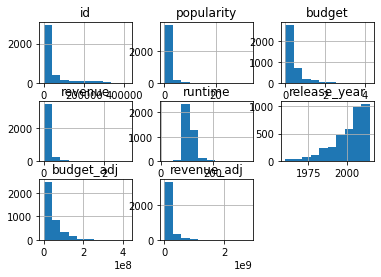

In [35]:
# general distribution
df.hist() ;

### Research Question 1 (Budget and Revenue / Years)

In [36]:
# COUNT of year
df.release_year.value_counts()

2011    199
2013    180
2010    178
2009    174
2006    169
2008    166
2014    165
2007    164
2005    163
2015    160
2012    157
2004    147
2002    126
2001    121
2003    121
1999    116
2000    106
1998    92 
1997    90 
1996    86 
1995    81 
1993    72 
1994    62 
1988    56 
1990    53 
1992    53 
1989    51 
1991    50 
1986    48 
1987    46 
1984    42 
1985    41 
1983    31 
1981    30 
1982    26 
1980    23 
1977    19 
1978    17 
1979    16 
1976    15 
1967    13 
1974    13 
1971    13 
1973    12 
1970    11 
1961    10 
1975    9  
1968    9  
1972    8  
1962    7  
1964    7  
1963    6  
1965    5  
1966    5  
1960    5  
1969    4  
Name: release_year, dtype: int64

    most release_years are from the late 90's till 2014
    2011 has highest count of data
    

#### Movies with max/min budget - revenue

check maximum budget 

In [37]:
df[df.budget == df.budget.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
682,46528,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Danny Huston|Ti Lung,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010,425000000.000000,11087569.000000


    revenue is much lower than budget

check minimum budget 

In [38]:
df[df.budget == df.budget.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
810,39964,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Stephanie Chang|Neal MacMillan,Jeff Pollack,95,Comedy|Romance,1999,1.309053,130.905285
1250,59296,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn Federici|James Brolin,Dermot Mulroney,90,Comedy|Romance,2011,0.969398,1335.830503


##### check max revenue

In [39]:
df[df.revenue == df.revenue.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
344,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009,240886902.887613,2827123750.411890


    revenue is much higher than budget 

##### check min revenue



In [40]:
df[df.revenue == df.revenue.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
1729,13537,0.462609,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevigny|Rosario Dawson|Melanie Lynskey,Billy Ray,94,Drama|History,2003,7112115.868695,2.370705
2893,2293,0.552091,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire Forlani|Ben Affleck,Kevin Smith,94,Romance|Comedy,1995,8585801.202642,2.861934


#### Budget & Revenue by Year

In [41]:
# classify budget by year
budget_by_time = df.groupby('release_year')['budget'].mean()
budget_by_time

release_year
1960   4161389.600000 
1961   3863700.000000 
1962   5635714.285714 
1963   10185833.333333
1964   4847880.142857 
1965   11760000.000000
1966   6453600.000000 
1967   7346153.846154 
1968   5994444.444444 
1969   5711021.750000 
1970   8718358.727273 
1971   3077076.923077 
1972   2958031.750000 
1973   4777250.000000 
1974   5352692.307692 
1975   4122222.222222 
1976   8033333.333333 
1977   7307894.736842 
1978   9774706.529412 
1979   14418750.000000
1980   13915217.391304
1981   9725000.000000 
1982   13226923.153846
1983   15652483.870968
1984   13643975.333333
1985   14543308.219512
1986   13106252.354167
1987   13237608.826087
1988   14487500.000000
1989   18980183.529412
1990   22577944.018868
1991   26300000.000000
1992   22892934.679245
1993   22231744.180556
1994   29335596.774194
1995   32350856.506173
1996   34682465.709302
1997   44758740.833333
1998   42956630.434783
1999   42394612.293103
2000   45652830.188679
2001   43192388.429752
2002   42879684.34127

In [42]:
revenue_by_time = df.groupby('release_year')['revenue'].mean()
revenue_by_time

release_year
1960   25801000.000000 
1961   33772018.800000 
1962   29475692.285714 
1963   29421147.000000 
1964   46944792.571429 
1965   91616370.800000 
1966   16947337.800000 
1967   56294972.076923 
1968   24691306.888889 
1969   57426769.000000 
1970   49997451.727273 
1971   28945131.538462 
1972   60112521.375000 
1973   92917758.250000 
1974   55397463.615385 
1975   93923030.000000 
1976   49995102.400000 
1977   99060972.894737 
1978   68898241.176471 
1979   73814384.375000 
1980   57483289.739130 
1981   53733381.933333 
1982   82909860.038462 
1983   64203252.967742 
1984   57297264.166667 
1985   55199382.512195 
1986   47801145.458333 
1987   59945146.347826 
1988   55826561.767857 
1989   89645691.529412 
1990   87764830.264151 
1991   87262429.700000 
1992   95969275.622642 
1993   85784915.361111 
1994   105212764.758065
1995   101586638.234568
1996   89759520.674419 
1997   115650310.255556
1998   100284297.771739
1999   97853311.689655 
2000   103301649.273585
200

##### statistic description of revenue over time

In [43]:
revenue_by_time.describe()

count   56.000000       
mean    82500774.486558 
std     34901743.099425 
min     16947337.800000 
25%     55719287.229739 
50%     88705260.896781 
75%     106282143.558218
max     163768267.506250
Name: revenue, dtype: float64

##### statistic description of budget over time

In [44]:
budget_by_time.describe()

count   56.000000      
mean    23310239.593262
std     16633513.306120
min     2958031.750000 
25%     7861538.461538 
50%     15097896.045240
75%     42527805.848626
max     48312805.891720
Name: budget, dtype: float64

    Diffrence between maximum revenue and maximum budget is huge (around 115 M)

In [45]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

##### Average Budget/Revenue by Year plot

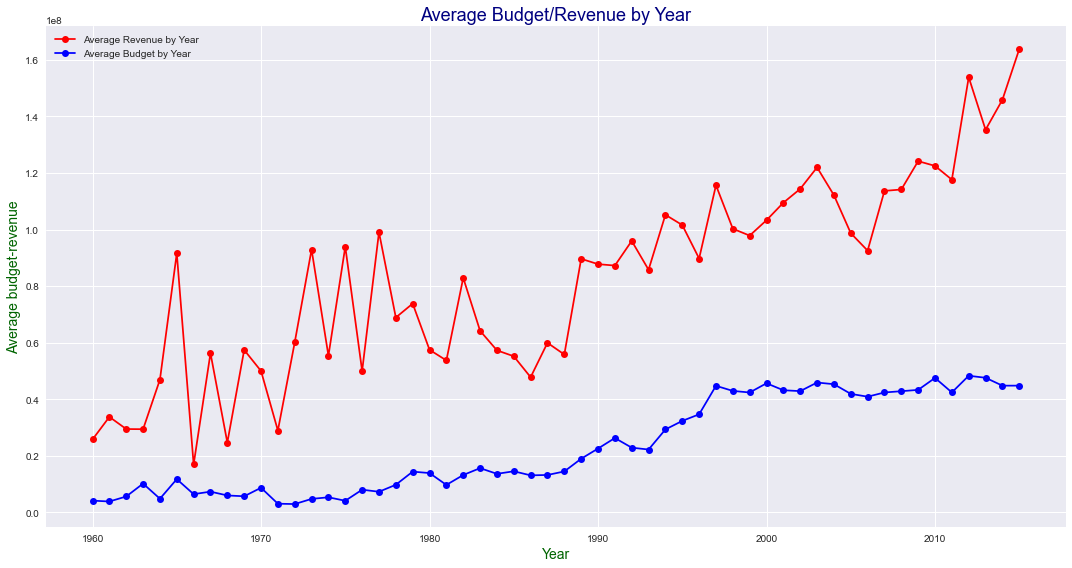

In [46]:
plt.style.use('seaborn')
revenue_by_time.plot(style='-ro', figsize=(15,8),label='Average Revenue by Year')
#plt.plot(timeyear.index,timeyear) multi index won't work
budget_by_time.plot(style='-bo', figsize=(15,8),label='Average Budget by Year')
plt.xlabel("Year",color = 'darkgreen',fontsize = 14)
plt.ylabel("Average budget-revenue",color = 'darkgreen',fontsize = 14)
plt.title("Average Budget/Revenue by Year" ,color = 'navy',fontsize = 18)
plt.legend()
plt.tight_layout()
#plt.savefig('budrev.png')

### Research Question 2   (Budget / Revenue correlation)

##### Plot Budget / Revenue correlation 

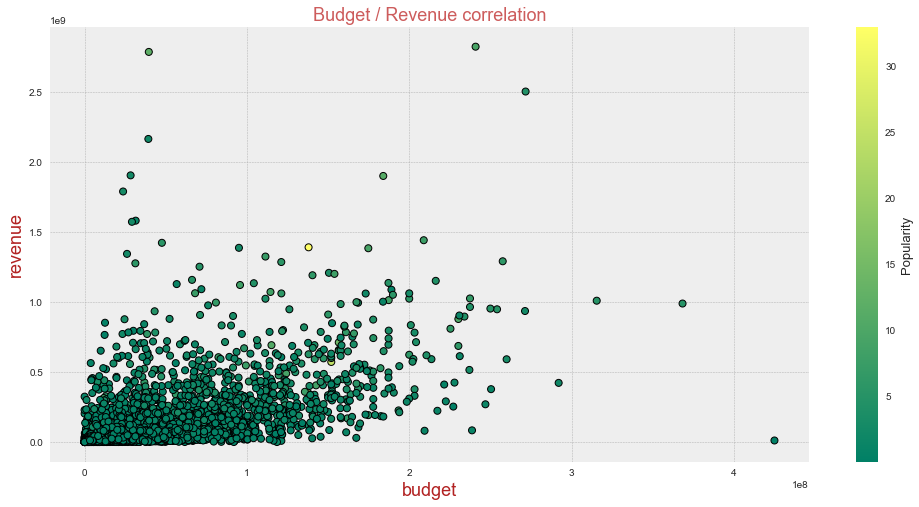

In [47]:
# alpha: transparrency
plt.style.use('bmh')
plt.figure(figsize = (17,8))
plt.scatter(df["budget_adj"], df["revenue_adj"], edgecolor = 'black',c = df['popularity'], cmap = 'summer', linewidth = 1)
plt.xlabel("budget" ,color = 'firebrick',fontsize = 18)
plt.ylabel("revenue" ,color = 'firebrick',fontsize = 18)
plt.title("Budget / Revenue correlation", color = 'indianred', fontsize = 18)
cbar = plt.colorbar()
cbar.set_label('Popularity', fontsize = 13)
#plt.savefig('corel.png')

    Points are near and correlation is not very clear, use logaritmic scale to illustrate more

##### Plot Budget / Revenue correlation on logarithmic scale


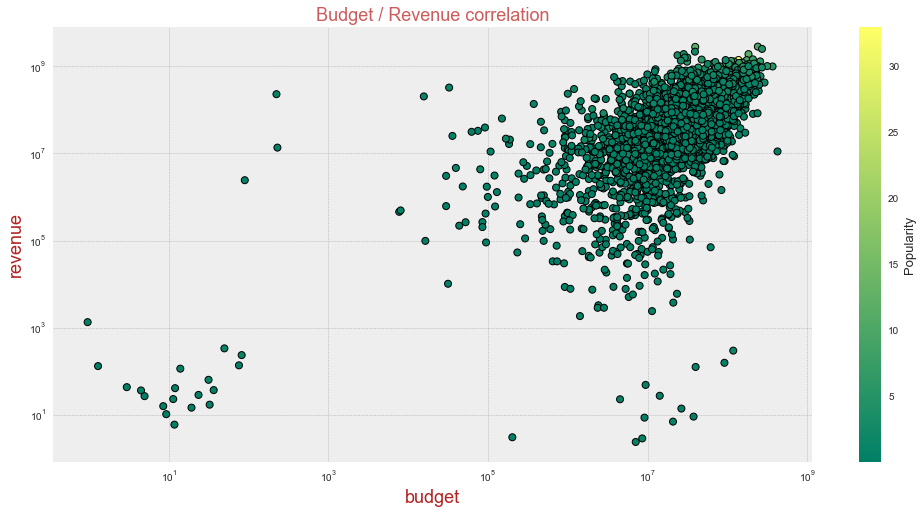

In [48]:

# alpha: transparrency
plt.style.use('bmh')
plt.figure(figsize = (17,8))
plt.scatter(df["budget_adj"], df["revenue_adj"], edgecolor = 'black',c = df['popularity'], cmap = 'summer', linewidth = 1)
plt.xlabel("budget" ,color = 'firebrick',fontsize = 18)
plt.ylabel("revenue" ,color = 'firebrick',fontsize = 18)
plt.title("Budget / Revenue correlation", color = 'indianred', fontsize = 18)
cbar = plt.colorbar()
cbar.set_label('Popularity', fontsize = 13)
plt.xscale('log')
plt.yscale('log')
#plt.savefig('corcolel.png')

### Research Question 3  (Genres by Popularity - Genres by Revenue)

##### Genre unique values and their count

In [49]:
print(genre_df['genres'].unique())
genre_df['genres'].nunique()

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'Foreign' 'TV Movie']


20

#### Counts of Genres 

In [50]:
values = genre_df.genres.value_counts()
values

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure          749 
Romance            666 
Crime              651 
Science Fiction    519 
Horror             463 
Family             425 
Fantasy            396 
Mystery            344 
Animation          201 
Music              134 
History            129 
War                119 
Western            52  
Documentary        31  
Foreign            12  
TV Movie           1   
Name: genres, dtype: int64

##### Plot chart of genres value counts as percentage
    to illustrate percentage of each genre from whole count of dataset

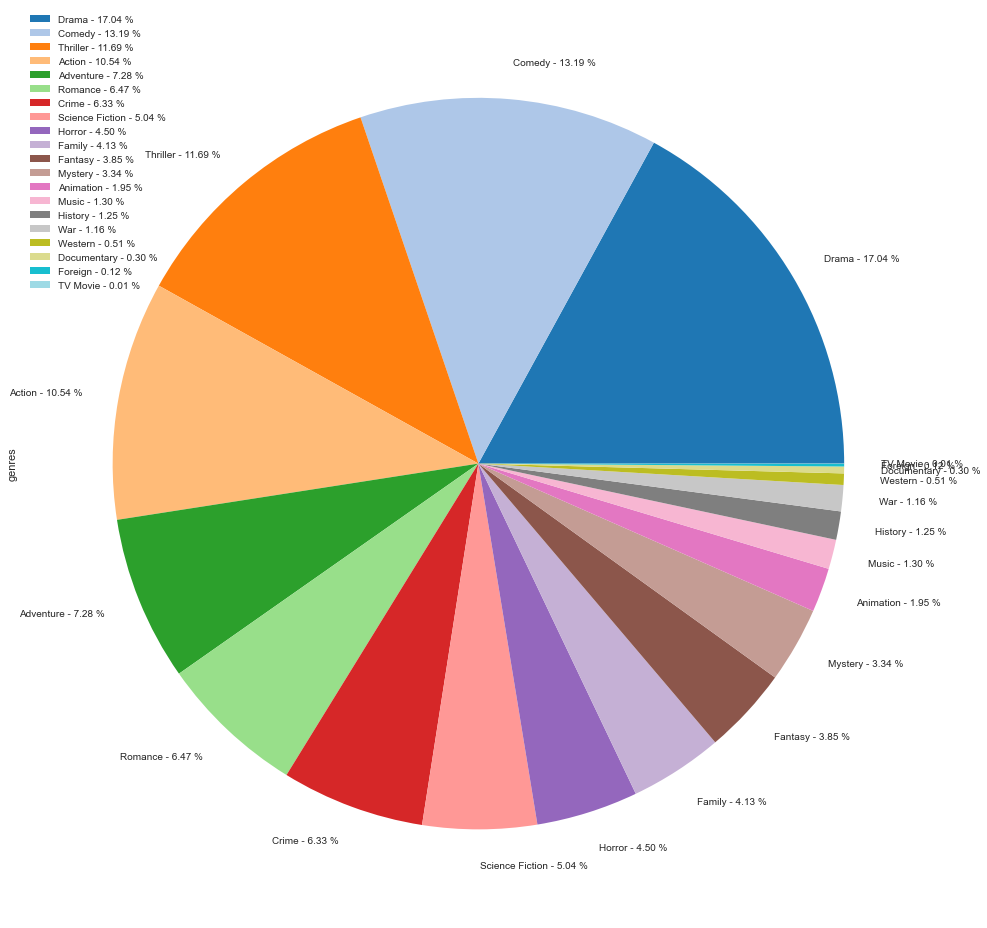

In [51]:
# color map used tab20
plt.style.use('seaborn')
plt.figure(figsize = (14,13))
x = values.index
y = values
percent = y * 100.0 / y.sum()
values.plot(kind = 'pie', labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)], cmap = 'tab20' )
plt.tight_layout()
plt.legend(loc="upper left")
#plt.savefig('piegenres.png')

    Drama is most common genre in dataset, then Comedy then Thriller and Action
    
    TV Movie is least common genre in dataset

### Average Popularity by Genre

In [52]:
# check for popularity of each genre
popularit_by_genre = genre_df.groupby('genres')['popularity'].mean()
# groupby is sorted by ascending order of index (keys), sort on values (popularity) in descending order
popularit_by_genre.sort_values(ascending = False)

genres
Science Fiction   1.873294
Adventure         1.867693
Fantasy           1.754315
Animation         1.710622
Action            1.567116
Family            1.459043
Thriller          1.259835
War               1.246129
Mystery           1.142613
Western           1.134246
Crime             1.123961
Comedy            1.012958
Drama             1.002834
History           0.970674
Romance           0.956101
Music             0.909718
Horror            0.854005
Documentary       0.316224
TV Movie          0.273628
Foreign           0.182271
Name: popularity, dtype: float64

High variance in popularity is noticed

##### Statistic description of averge popularity by genre

In [53]:
popularit_by_genre.describe()

count   20.000000
mean    1.130864 
std     0.495104 
min     0.182271 
25%     0.944506 
50%     1.129103 
75%     1.486062 
max     1.873294 
Name: popularity, dtype: float64

##### Plot average popularity by genre 

<BarContainer object of 20 artists>

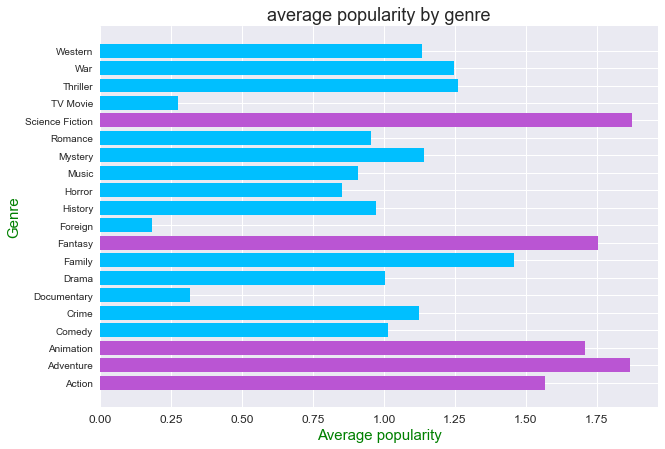

In [54]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 7))

# third quartile limit (deepskyblue < 75%)
clrs = ['deepskyblue' if (x < popularit_by_genre.quantile(0.75)) else 'mediumorchid' for x in popularit_by_genre ]

plt.xticks( fontsize = 12)

plt.xlabel("Average popularity", fontsize = 15, color = 'green')
plt.ylabel("Genre", fontsize = 15, color = 'green')
plt.title("average popularity by genre", fontsize = 18)

plt.barh(popularit_by_genre.index, popularit_by_genre, color = clrs)
#plt.savefig('popgenre.png')

### Average Revenue by Genre

In [55]:
revenue_by_genre = genre_df.groupby('genres')['revenue_adj'].mean()
revenue_by_genre.sort_values(ascending = False)

genres
Animation         290957382.263666
Adventure         271407469.108229
Fantasy           249992751.604266
Family            243791030.515130
Science Fiction   202153142.410270
Action            195387938.297204
War               155898111.707616
Music             136566235.271433
Western           135674767.387727
Thriller          128277423.930542
History           121661724.409661
Comedy            121389713.413560
Romance           113673567.752457
Mystery           113621019.756683
Crime             110395135.210048
Drama             101544976.657924
Horror            81406555.096210 
TV Movie          58389103.036331 
Documentary       26947916.150225 
Foreign           12866538.205437 
Name: revenue_adj, dtype: float64

##### Statistic description of averge revenue by genre

In [56]:
revenue_by_genre.describe()

count   20.000000       
mean    143600125.109231
std     77283942.703589 
min     12866538.205437 
25%     108182595.572017
50%     124969574.170102
75%     197079239.325470
max     290957382.263666
Name: revenue_adj, dtype: float64

##### Plot average revenue by genre 

<BarContainer object of 20 artists>

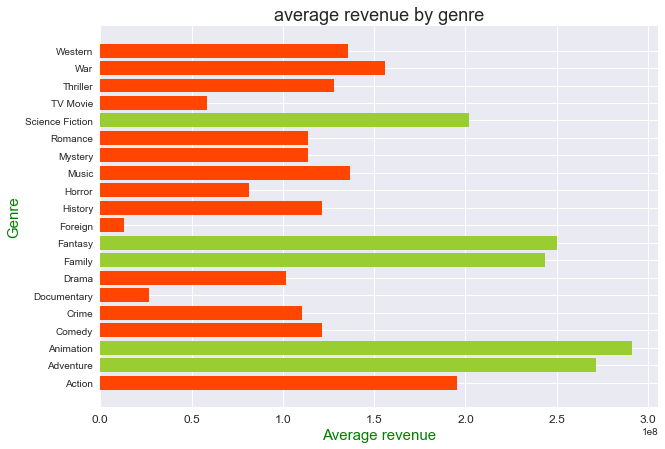

In [57]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 7))

# third quartile limit (orangered < 75%)
clrs = ['orangered' if (x < revenue_by_genre.quantile(0.75)) else 'yellowgreen' for x in revenue_by_genre ]

plt.xticks( fontsize = 12)

plt.xlabel("Average revenue", fontsize = 15, color = 'green')
plt.ylabel("Genre", fontsize = 15, color = 'green')
plt.title("average revenue by genre", fontsize = 18)

plt.barh(revenue_by_genre.index, revenue_by_genre, color = clrs)
#plt.savefig('revngenre.png')

    Foreign then Documentary are the lowest average revenue
    Animation and Adventure have highest revenue on average.

#### Genres count over the years 

In [58]:
genre_by_time = pd.DataFrame(genre_df.groupby(['genres', 'release_year']).size())
genre_by_time

0
genres  release_year   
Action  1960          2
        1961          2
        1962          2
        1963          2
        1964          1
...                  ..
Western 2011          2
        2012          1
        2013          2
        2014          1
        2015          2

[841 rows x 1 columns]

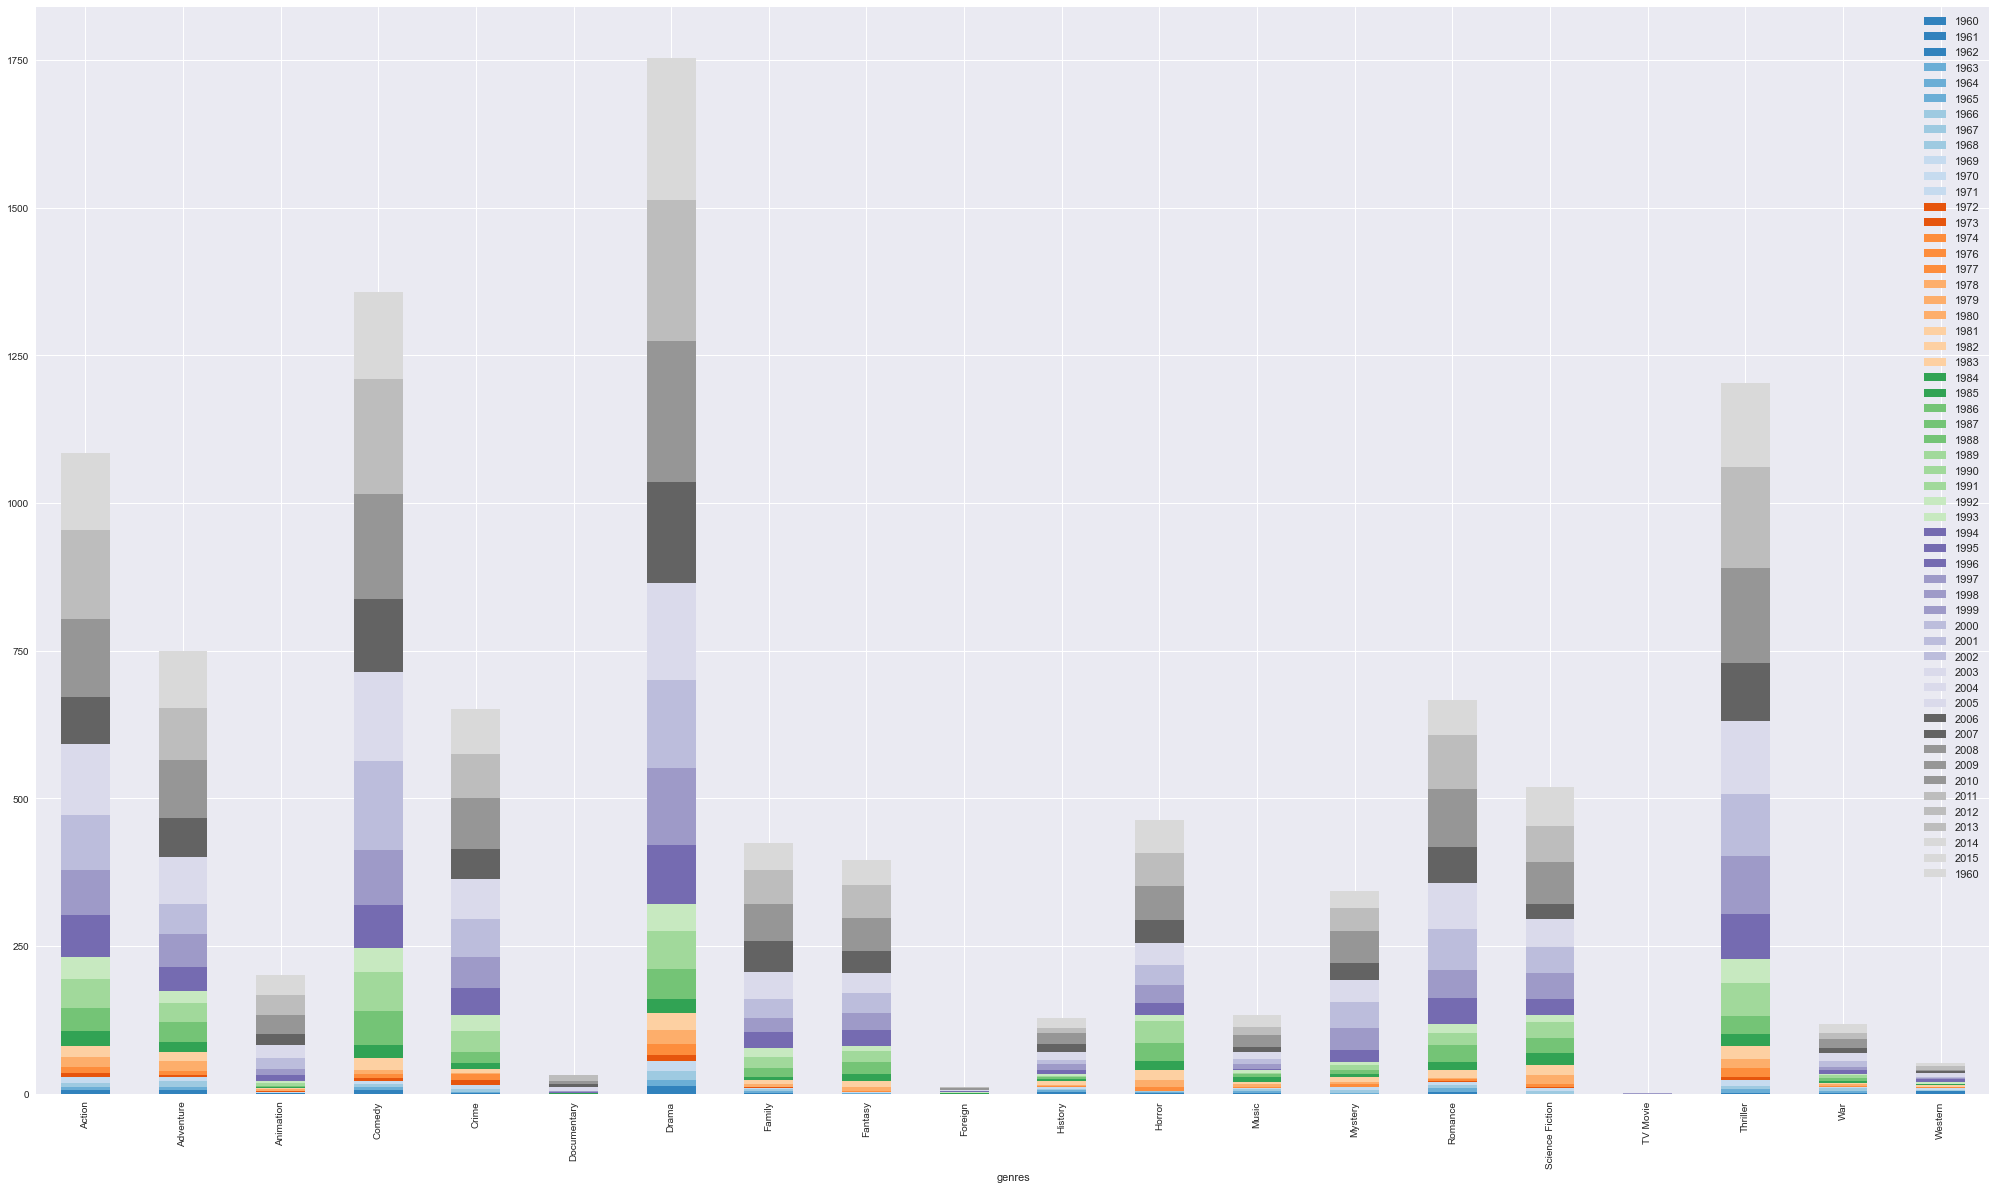

In [59]:
# Stack bar of genres
plt.style.use('seaborn-dark-palette')
# barh
genre_by_time.unstack().plot(kind='bar', stacked=True, figsize=(35, 20), cmap = 'tab20c')
# second index is year
plt.legend(genre_by_time.index.get_level_values(1), loc="upper right", prop={'size': 11})
#plt.savefig('lol')

### Research Question 4  (Cast ρ Revenue/Popularity)

In [60]:
cast_df

,id,popularity,original_title,release_year,budget_adj,revenue_adj,cast
0,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Chris Pratt
1,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Bryce Dallas Howard
2,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Irrfan Khan
3,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Vincent D'Onofrio
4,135397,32.985763,Jurassic World,2015,137999939.280026,1392445892.523800,Nick Robinson
...,...,...,...,...,...,...,...
19186,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Stephen Boyd
19187,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Raquel Welch
19188,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Edmond O'Brien
19189,2161,0.207257,Fantastic Voyage,1966,34362645.151105,80616176.307578,Donald Pleasence


In [61]:
# number of cast in dataset
cast_df['cast'].nunique()

6835

##### take first 100  cast by values count   in data set with a min of 20 appearance

In [62]:
cast =cast_df['cast'].value_counts()[:100]
cast

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
                     ..
Anne Hathaway        20
Naomi Watts          20
Forest Whitaker      20
Kevin Spacey         20
Sigourney Weaver     20
Name: cast, Length: 100, dtype: int64

In [63]:
# cast.index is the name of the cast 
# create total cast dataframe of 100 first occurrence 
first_100 = cast_df[cast_df['cast'].isin(cast.index)]
first_100

,id,popularity,original_title,release_year,budget_adj,revenue_adj,cast
6,76341,28.419936,Mad Max: Fury Road,2015,137999939.280026,348161292.489031,Charlize Theron
15,140607,11.173104,Star Wars: The Force Awakens,2015,183999919.040035,1902723129.801820,Harrison Ford
22,168259,9.335014,Furious 7,2015,174799923.088033,1385748801.470520,Jason Statham
24,168259,9.335014,Furious 7,2015,174799923.088033,1385748801.470520,Dwayne Johnson
30,87101,8.654359,Terminator Genisys,2015,142599937.256027,405355075.683766,Arnold Schwarzenegger
...,...,...,...,...,...,...,...
19111,11778,0.959754,The Deer Hunter,1978,50140510.423711,167135034.745702,Robert De Niro
19114,11778,0.959754,The Deer Hunter,1978,50140510.423711,167135034.745702,Christopher Walken
19115,11778,0.959754,The Deer Hunter,1978,50140510.423711,167135034.745702,Meryl Streep
19131,28932,0.439210,F.I.S.T.,1978,36.769708,36.769708,Sylvester Stallone


### Average Popularity by Cast

In [64]:
# average popularity of cast
pop_by_cast = first_100.groupby('cast')['popularity'].mean()
# modify series to sort by descending popularity
pop_by_cast.sort_values(ascending = False, inplace = True)
pop_by_cast

cast
Anne Hathaway        3.089934
Scarlett Johansson   3.020237
Michael Caine        2.956060
Charlize Theron      2.424122
Robert Downey Jr.    2.365688
                       ...   
Gene Hackman         0.778653
Dennis Quaid         0.776399
Susan Sarandon       0.768867
Richard Gere         0.758595
Paul Giamatti        0.728992
Name: popularity, Length: 100, dtype: float64

##### statistic description of cast popularity
    varies [0.728992 - 3.089934]

In [65]:
pop_by_cast.describe()

count   100.000000
mean    1.456805  
std     0.477417  
min     0.728992  
25%     1.139686  
50%     1.419257  
75%     1.595612  
max     3.089934  
Name: popularity, dtype: float64

Text(0.5, 1.0, 'Distribution of popularity by cast')

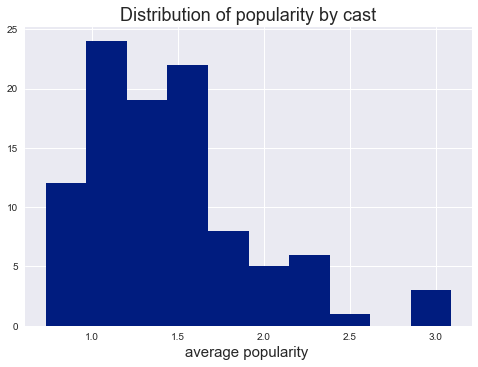

In [66]:
# histogram ditribution of popularity by cast
pop_by_cast.hist()
plt.xlabel("average popularity ", fontsize = 15)
plt.title("Distribution of popularity by cast", fontsize = 18)

    popularity values greater than 2.5 up to 3 are considerd outliers (by cast)

##### Plot average popularity by cast 
    take first 30 cast by descending popularity order to further analyze

<BarContainer object of 30 artists>

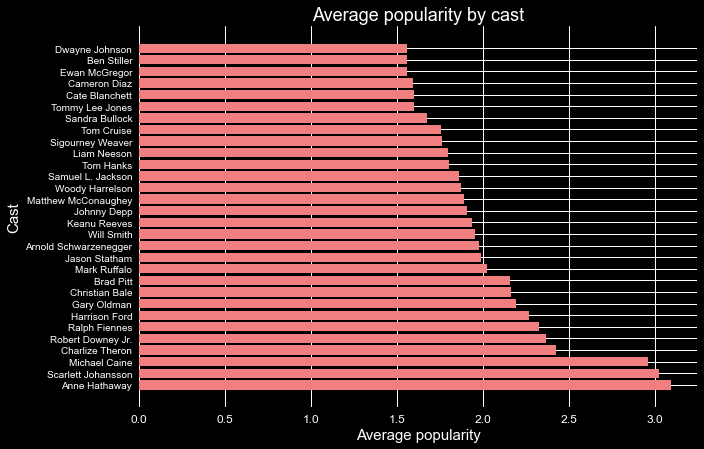

In [67]:
# NOTE: IF YOU WANT TO SORT THEM  BY ALPHABETIC YOU COULD SAVE INITIAL INDEX BEFORE SORT AND QUERY
# take first 30 cast in popularity
plt.style.use('dark_background')
plt.figure(figsize=(10, 7))

plt.xticks( fontsize = 12)

plt.xlabel("Average popularity", fontsize = 15)
plt.ylabel("Cast", fontsize = 15)
plt.title("Average popularity by cast", fontsize = 18)
# selecting first 30
plt.barh(pop_by_cast.index[:30], pop_by_cast[:30], color = 'lightcoral')
#plt.savefig('popbycast.png')

#### Plot average Revenue by Cast
    take first 30 cast by descending revenue order to further analyze

In [68]:
# average popularity of cast
revenue_by_cast = first_100.groupby('cast')['revenue_adj'].mean()
# modify series to sort by descending popularity
revenue_by_cast.sort_values(ascending = False, inplace = True)
# could take highest 30 by revenue (hist of all is better)
# revenue_by_cast = revenue_by_cast[:30]

In [69]:
revenue_by_cast.describe()

count   100.000000      
mean    179776128.938334
std     73671792.634818 
min     55938841.770446 
25%     130675379.137278
50%     168214759.120714
75%     222727764.166649
max     420167545.236802
Name: revenue_adj, dtype: float64

#####  Plot distribution of average revenue by cast
    check for outliers and revenue distribution 

Text(0.5, 1.0, 'Distribution of average revenue by cast')

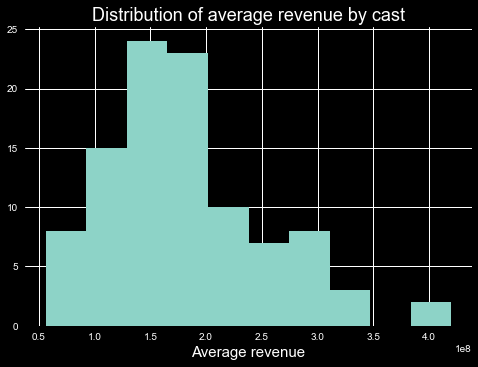

In [70]:
revenue_by_cast.hist()
plt.xlabel("Average revenue", fontsize = 15)
plt.title("Distribution of average revenue by cast", fontsize = 18)

    Revenue values around 4 * 10^8 are outliers

##### Plot average revenue by cast 
    take first 30 cast in descending average revenue order

<BarContainer object of 30 artists>

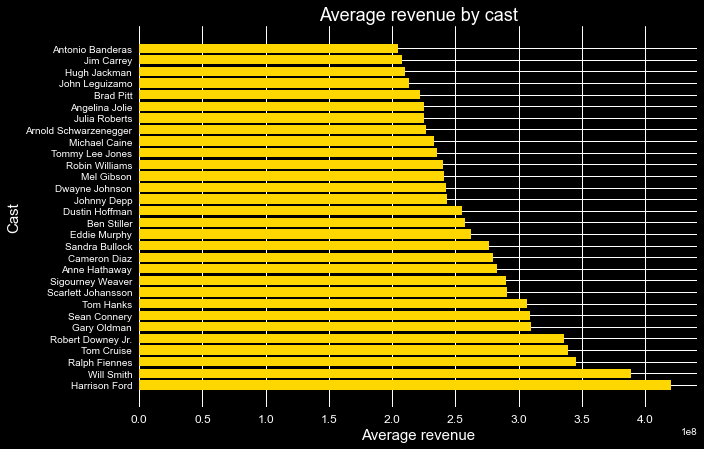

In [71]:
# NOTE: IF YOU WANT TO SORT THEM  BY ALPHABETIC YOU COULD SAVE INITIAL INDEX BEFORE SORT AND QUERY
# take first 30 cast in revenue
plt.style.use('dark_background')
plt.figure(figsize=(10, 7))

plt.xticks( fontsize = 12)

plt.xlabel("Average revenue", fontsize = 15)
plt.ylabel("Cast", fontsize = 15)
plt.title("Average revenue by cast", fontsize = 18)
# selecting first 30
plt.barh(revenue_by_cast.index[:30], revenue_by_cast[:30], color = 'gold')
#plt.savefig('revenuecast.png')

Notice: diffrence in cast values from popularity

##### Does popular cast generate high revenue and vice versa?
    take on 30 descedning order samples from revenue and popularity

In [72]:
# high in revenue not in popularity (note: ) from top 30
print(revenue_by_cast[:30][~revenue_by_cast.index[:30].isin(pop_by_cast.index[:30])])
# count 
revenue_by_cast[:30][~revenue_by_cast.index[:30].isin(pop_by_cast.index[:30])].count()

cast
Sean Connery       308635848.453934
Eddie Murphy       262603333.158160
Dustin Hoffman     254933219.092358
Mel Gibson         240854528.566975
Robin Williams     240119881.584966
Julia Roberts      225341690.670187
Angelina Jolie     225069278.647977
John Leguizamo     213010372.022447
Hugh Jackman       210007553.417501
Jim Carrey         207885470.550023
Antonio Banderas   204950024.626427
Name: revenue_adj, dtype: float64


11

In [73]:
# high in popularity  not in revenue  (note:~ )
print(pop_by_cast[:30][~pop_by_cast.index[:30].isin(revenue_by_cast.index[:30])])
# count 
pop_by_cast[:30][~pop_by_cast.index[:30].isin(revenue_by_cast.index[:30])].count()

cast
Charlize Theron       2.424122
Christian Bale        2.164398
Mark Ruffalo          2.024504
Jason Statham         1.989526
Keanu Reeves          1.935018
Matthew McConaughey   1.886638
Woody Harrelson       1.871300
Samuel L. Jackson     1.857995
Liam Neeson           1.795557
Cate Blanchett        1.595189
Ewan McGregor         1.557766
Name: popularity, dtype: float64


11

### director and runtime



In [74]:
'''
could use groupby dataframe with multiple columns  groupby('')  will be index 
director_20.groupby('director')[['runtime','popularity']].mean()
'''
# create dataframe with 20 most common directors
direct = df.director.value_counts()[:20]
director_20 = df[df['director'].isin(direct.index)]
director_20.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff Daniels|Michael PeÃ±a,Ridley Scott,141,Drama|Adventure|Science Fiction,2015,99359956.281619,547749654.310152
32,296098,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Sebastian Koch,Steven Spielberg,141,Thriller|Drama,2015,36799983.808007,149601569.335309
63,205775,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy|Brendan Gleeson|Ben Whishaw,Ron Howard,122,Thriller|Drama|Adventure|Action|History,2015,91999959.520018,86315059.381374
76,285783,2.049886,35000000,61181942,The Walk,Joseph Gordon-Levitt|Ben Kingsley|Charlotte Le Bon|Ben Schwartz|James Badge Dale,Robert Zemeckis,123,Adventure|Drama|Thriller,2015,32199985.832006,56287361.873561
120,282984,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Parker Posey|Meredith Hagner,Woody Allen,95,Mystery|Drama,2015,10119995.547202,25199786.192094


In [75]:
director_20.groupby('director')['runtime'].mean().sort_values(ascending = False)

director
Oliver Stone           140.933333
Martin Scorsese        140.529412
Steven Spielberg       135.444444
Francis Ford Coppola   132.384615
Ridley Scott           131.857143
Clint Eastwood         129.875000
Ron Howard             128.357143
Barry Levinson         122.333333
Robert Zemeckis        120.133333
Richard Donner         120.000000
Tony Scott             116.785714
Brian De Palma         116.266667
Joel Schumacher        113.714286
Tim Burton             110.312500
Steven Soderbergh      110.294118
Renny Harlin           109.200000
Wes Craven             105.000000
John Carpenter         98.250000 
Woody Allen            96.333333 
Robert Rodriguez       95.666667 
Name: runtime, dtype: float64

<a id='conclusions'></a>
## Conclusion

For the First research problem, Target was to analyze the Budget and Revenue over the years and get a sense of their correlation with time variable. For this analysis Original Revenue and Budget numbers were used (not adjusted no.s). Answered question using Average Revenue and Average Budget by Year.Revenue increased over the time, and reached an all time high in the most recent year of the dataset (2014), yet with continous ups and downs.Budget increased over time with a stable increase. Revenue is much higher than Budget with high variance which is clear by plot.

For the Second problem, Target was to find correlation between Budget and Revenue.By using scatter plot after illustration of logarithmic scale, There is a positive correlation between Budget and Revenue, yet the correlation is not strong.High Budget doesn't neccesarily indicate high Revenue, which was the case in movie of highest budget that generated revenue around 2.5% its budget.

For the third problem, thorough analysis was made for Genre, most common genres in dataset and how Genre affects Revenue(adj) and Popularity. Drama was the most common Genre in dataset with a little margin then came Comedy, Thriller and Action.Average Revenue and Popularity illustration tool was bar chart. Foreign, Documentary and TV Movie were least popular and lowest in revenue generation. Animation and Adventure generated highest revenues. Science Fiction and Adventure were the most popular genres.Tried analyzing Genres growth over years though analysis didn't deem fruitful. Overall: Animation, Adventure, Science Fiction, Family and Fantasy seem promising on Revenue and Popularity fronts. Strong correlation between Popularity and Revenue is indicated on Gerne basis.

For the fourth problem, Analyzing Cast on by Average Revenue and Popularity to get most popular, highest in Revenue generation for on sample of most value counts Cast. Anne Hathaway was by far the most popular, then came Scarlett Johansson and Michael Caine. Harrison Ford generated highest revenue with a little margin, then came Will Smith. Detected diffrence in Cast by Popularity and Revenue(adj), and after some investagtion found that 11 out of 30 were in a metric and not the other. Not all cast highest in popularity, are highest in revenue generation, and vice versa (yet higher probability around 60%).

Average runtime of movie is 106 min.

## Limitations

Missing values and data were Revenue = 0 or Budget = 0 or both. Which in turn shrinked the number of samples in the dataset after dropping. 

Time interval was wide (from 1960-2014) which resulted in comparing Cast and Director on properties as their intervals differ. However adjusted revenue and budget limited this problem on these properties basis.




## Store

In [76]:
# Save df after cleaning
df.to_csv('tmdb-movies-enhanced.csv',  index=False)